In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib.dates import DateFormatter
import seaborn as sns

sns.set_theme()
sns.set_context("paper")
sns.set_palette("colorblind")


In [4]:
# Loading in SOPHIE Data
sophie80df = pd.read_csv("Data/SOPHIE_EPT80_1990-2022.csv", low_memory=False)
sophie80df['Date_UTC'] = pd.to_datetime(sophie80df['Date_UTC'])
sophie80df = sophie80df[sophie80df['Date_UTC'].between('1996','2021')].reset_index(drop=True)
sophie80df['Delbay'] = pd.to_numeric(sophie80df['Delbay'],errors='coerce')

array = np.zeros(len(sophie80df['Date_UTC']),dtype=int)
for i in range(1,len(sophie80df['Date_UTC'])-2):
    if (sophie80df.iloc[i-1]['Phase'] == 1) and (sophie80df.iloc[i]['Phase'] == 2) and (sophie80df.iloc[i]['Flag'] == 0) and (sophie80df.iloc[i+1]['Phase'] == 3) and (sophie80df.iloc[i+2]['Phase'] == 1):
        array[i] = 1 # GERG
        continue
    if (sophie80df.iloc[i-1]['Phase'] == 1) and (sophie80df.iloc[i]['Phase'] == 2) and (sophie80df.iloc[i]['Flag'] == 0) and (sophie80df.iloc[i+1]['Phase'] == 3) and (sophie80df.iloc[i+2]['Phase'] == 2):
        array[i] = 2 # GERE
        continue
    else:
        array[i] = 0
        continue
sophie80df['Isolated Type'] = array


(0.0, 10.0)

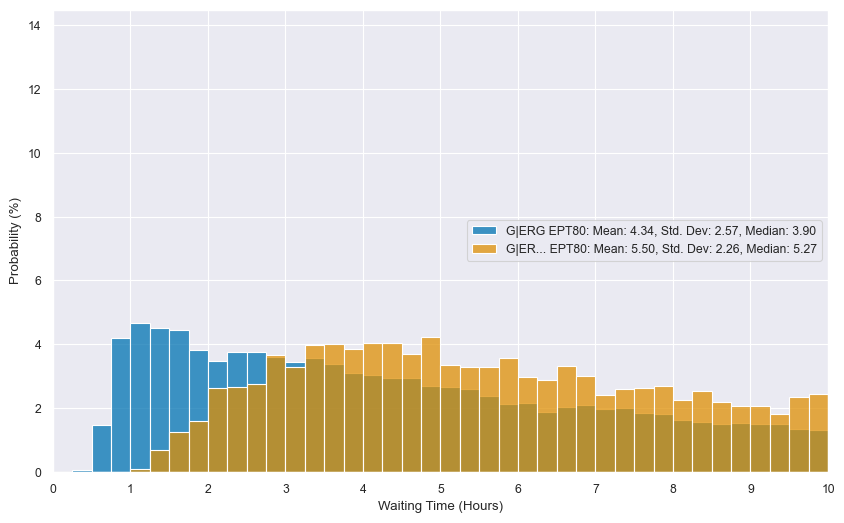

In [17]:
onlyonsets_wt = np.diff(sophie80df['Date_UTC'][sophie80df['Isolated Type'] == 1])/pd.to_timedelta(1, unit='h')
onlyonsets_wt_10 = onlyonsets_wt[onlyonsets_wt < 10]

onsets_extra_wt = np.diff(sophie80df['Date_UTC'][sophie80df['Isolated Type'] == 2])/pd.to_timedelta(1, unit='h')
onsets_extra_wt_10 = onsets_extra_wt[onsets_extra_wt < 10]

fig, axes = plt.subplots(figsize=(10,6))

sns.histplot(onlyonsets_wt_10, bins=np.arange(0,10.25,0.25), ax=axes, stat='percent', label='G|ERG EPT80: Mean: {:.2f}, Std. Dev: {:.2f}, Median: {:.2f}'.format(np.nanmean(onlyonsets_wt_10),np.nanstd(onlyonsets_wt_10),np.nanmedian(onlyonsets_wt_10)))
sns.histplot(onsets_extra_wt_10, bins=np.arange(0,10.25,0.25), ax=axes, stat='percent', label='G|ER... EPT80: Mean: {:.2f}, Std. Dev: {:.2f}, Median: {:.2f}'.format(np.nanmean(onsets_extra_wt_10),np.nanstd(onsets_extra_wt_10),np.nanmedian(onsets_extra_wt_10)))
axes.xaxis.set_major_locator(ticker.MultipleLocator(1))
axes.set_ylim(0,14.5)
axes.legend(loc='center right')
axes.set_xlabel('Waiting Time (Hours)')
axes.set_ylabel('Probability (%)')
axes.set_xlim(0,10)


Text(0, 0.5, 'Probability (%)')

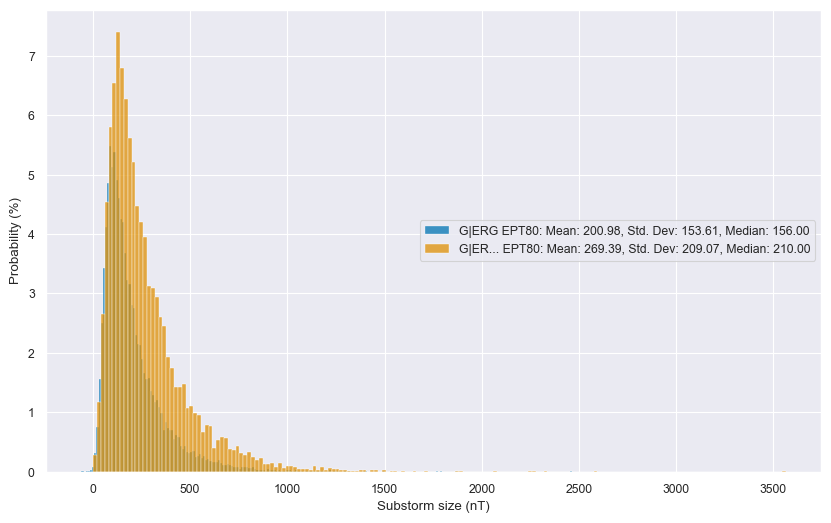

In [16]:
onsetsonlysize = -sophie80df['Delbay'][sophie80df['Isolated Type'] == 1]
onsetextrasize = -sophie80df['Delbay'][sophie80df['Isolated Type'] == 2]

fig, axes = plt.subplots(figsize=(10,6),sharex=True,sharey=True)

sns.histplot(onsetsonlysize, ax=axes, stat='percent', label='G|ERG EPT80: Mean: {:.2f}, Std. Dev: {:.2f}, Median: {:.2f}'.format(np.nanmean(onsetsonlysize),np.nanstd(onsetsonlysize),np.nanmedian(onsetsonlysize)))
sns.histplot(onsetextrasize, ax=axes, stat='percent', label='G|ER... EPT80: Mean: {:.2f}, Std. Dev: {:.2f}, Median: {:.2f}'.format(np.nanmean(onsetextrasize),np.nanstd(onsetextrasize),np.nanmedian(onsetextrasize)))
axes.legend(loc='center right')
axes.set_xlabel('Substorm size (nT)')
axes.set_ylabel('Probability (%)')

In [13]:
sophie80df[sophie80df['Isolated Type'] == 1]

,Date_UTC,Phase,Flag,MLT,MLat,Delbay,SML Val at End,Isolated Type
13,1996-01-02 08:52:00,2,0,0.0,73.0,-170.0,-227.0,1
16,1996-01-02 16:00:00,2,0,0.0,65.0,-411.0,-476.0,1
19,1996-01-02 17:28:00,2,0,1.0,65.0,-185.0,-342.0,1
44,1996-01-03 11:43:00,2,0,1.0,66.0,-280.0,-397.0,1
47,1996-01-03 16:51:00,2,0,4.0,70.0,-33.0,-114.0,1
...,...,...,...,...,...,...,...,...
182273,2021-12-30 01:25:00,2,0,1.0,70.0,-78.0,-134.0,1
182276,2021-12-30 02:30:00,2,0,22.0,72.0,-20.0,-122.0,1
182288,2021-12-30 12:39:00,2,0,1.0,70.0,-71.0,-102.0,1
182301,2021-12-31 04:51:00,2,0,22.0,72.0,-75.0,-96.0,1
